# IBM Quantum Experience Lab - Lab script

Please use this notebook as a template for the work that you will submit for assessment for this lab exercise.

Student Names: ENTER YOUR NAMES HERE

## Warm up exercise

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, Aer
from qiskit.tools.visualization import circuit_drawer
from qiskit import Aer
import matplotlib.pyplot as plt

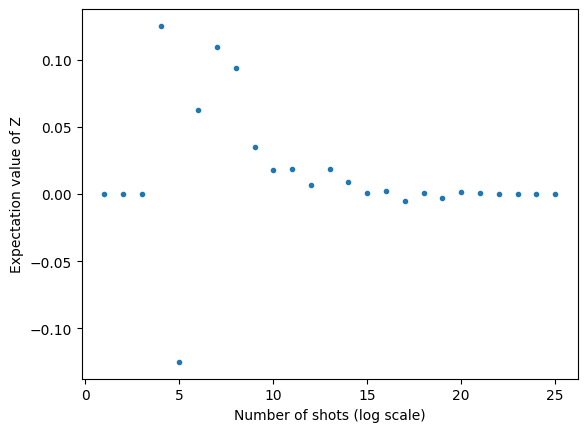

In [2]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
circuit = QuantumCircuit(qr, cr)

circuit.h(qr[0])
circuit.measure(qr[0],cr[0])


backend = Aer.get_backend('qasm_simulator')

def get_expectation(result,circuit):
    return (result.get_counts(circuit)['0']-result.get_counts(circuit)['1'])/ (result.get_counts(circuit)['0'] + result.get_counts(circuit)['1'])
                                                                    
expectation_values = []
for n in range(1,26):
    job = execute(circuit, backend,shots=2**n)
    result = job.result()
    expectation_values.append(get_expectation(result,circuit))

plt.plot([n for n in range(1,26)], expectation_values, '.')
plt.xlabel('Number of shots (log scale)')
plt.ylabel('Expectation value of Z')
plt.show()

# Main Lab Exercise

In [40]:
import math
import numpy as np
#Functions
def get_expectation(circuit,backend,logshots):
    job = execute(circuit, backend,shots=2**logshots)
    result = job.result().get_counts(circuit) 
    keys = list(result.keys())
    if set(keys) == set(['0','1']):
        return (result['0']-result['1'])/(result['0']+result['1'])   
    elif keys == ['0']:
        return 1.0
    elif keys == ['1']:
        return -1.0

def get_expectation_distribution(circuit, logshot, backend, draw=False):
    expectation_values = []
    for n in range(1,logshot):
        expectation_values.append(get_expectation(circuit,backend,n))
    if draw == True:
        plt.plot([n for n in range(1,logshot)], expectation_values, '.')
        plt.xlabel('Number of shots (log scale)')
        plt.ylabel('Expectation value of Z')
        plt.show()
        plt.close()
    return expectation_values

def initial_state(phi):
    state = math.cos(phi)*np.array([1,0]) + 1j*math.sin(phi)* np.array([0,1])
    return state


In [41]:
# Method 1 - apply HU^dagger(theta) and measure Z

#Build the cirquit
def method_1_circuit(theta, phi):
    qr = QuantumRegister(1)
    cr = ClassicalRegister(1)
    circuit = QuantumCircuit(qr, cr)
    circuit.initialize(initial_state(phi), qr[0])
    circuit.p(-theta, qr[0])
    circuit.h(qr[0])
    circuit.measure(qr[0],cr[0])
    return circuit

circuit_drawer(method_1_circuit(theta=math.pi/8, phi=math.pi/4))

┌──────────────────────────────┐┌─────────┐┌───┐┌─┐
 q238: ┤ Initialize(0.70711,0.70711j) ├┤ P(-π/8) ├┤ H ├┤M├
       └──────────────────────────────┘└─────────┘└───┘└╥┘
c62: 1/═════════════════════════════════════════════════╩═
                                                        0

In [43]:
# Method 2
# M(theta) = cos(theta)X + sin(theta)Y
# alpha = cos(theta) ; beta = sin(theta)

#Build the cirquits

#Measure X expectation value circuit
def method_2_X_circuit(theta,phi):
    qr = QuantumRegister(1)
    cr = ClassicalRegister(1)
    circuit = QuantumCircuit(qr, cr)
    circuit.initialize(initial_state(phi), qr[0])
    circuit.h(qr[0])
    circuit.measure(qr[0],cr[0])
    circuit_drawer(circuit)
    return circuit


circuit_drawer(method_2_X_circuit(theta=math.pi/4, phi=0))

┌─────────────────┐┌───┐┌─┐
 q244: ┤ Initialize(1,0) ├┤ H ├┤M├
       └─────────────────┘└───┘└╥┘
c64: 1/═════════════════════════╩═
                                0

In [44]:
#Measure Y expectation value circuit
def method_2_Y_circuit(theta,phi):
    qr = QuantumRegister(1)
    cr = ClassicalRegister(1)
    circuit = QuantumCircuit(qr, cr)
    circuit.initialize(initial_state(phi), qr[0])
    circuit.p(-math.pi/2,qr[0])
    circuit.h(qr[0])
    circuit.measure(qr[0],cr[0])
    circuit_drawer(circuit)
    return circuit

circuit_drawer(method_2_Y_circuit(theta=math.pi/4, phi=0))

┌─────────────────┐┌─────────┐┌───┐┌─┐
 q245: ┤ Initialize(1,0) ├┤ P(-π/2) ├┤ H ├┤M├
       └─────────────────┘└─────────┘└───┘└╥┘
c65: 1/════════════════════════════════════╩═
                                           0

In [45]:
def method1(theta,phi,backend,shots):
    circuit = method_1_circuit(theta, phi)
    return get_expectation(circuit,backend,shots)

def method2(theta,phi,backend,shots):
    circuit_X = method_2_X_circuit(theta, phi)
    expectation_X = get_expectation(circuit_X,backend,shots)
    circuit_Y = method_2_Y_circuit(theta,phi)
    expectation_Y = get_expectation(circuit_Y,backend,shots)
    expectation_M = math.cos(theta)*expectation_X + math.sin(theta)*expectation_Y
    return expectation_M

In [50]:
theta=math.pi/4
phi=0
shots = 20 #log scale
backend = Aer.get_backend('qasm_simulator')
print('Expectation value method 1:', method1(theta,phi,backend,shots))
print('Expectation value method 2:', method2(theta,phi,backend,shots))

Expectation value method 1: 0.0002079010009765625
Expectation value method 2: 0.0002360223516610066


In [47]:
theta=math.pi/8
phi=math.pi/4
shots = 20 #log scale
backend = Aer.get_backend('qasm_simulator')
print('Expectation value method 1:', method1(theta,phi,backend,shots))
print('Expectation value method 2:', method2(theta,phi,backend,shots))

Expectation value method 1: 0.3817634582519531
Expectation value method 2: 0.38471167894315467
